In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
X=data.drop(columns=['target'])

In [6]:
y=data['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [9]:
print(X_train.shape)

(820, 13)


In [10]:
print(X_test.shape)

(205, 13)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [12]:
from sklearn.ensemble import StackingClassifier

In [13]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [18]:
model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [19]:
model.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [20]:
y_perd=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_perd)

1.0

In [22]:
# oob score, bagingg vs random forest, feature importance


data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2
637,58,0,2,120,340,0,1,172,0,0.0,2,0,2
912,35,1,0,120,198,0,1,130,1,1.6,1,0,3
813,53,1,0,140,203,1,0,155,1,3.1,0,0,3
34,50,1,2,129,196,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,62,0,0,150,244,0,1,154,1,1.4,1,0,2
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2
165,59,1,0,170,326,0,0,140,1,3.4,0,0,3
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3


In [26]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3
758,46,0,1,105,204,0,1,172,0,0.0,2,0,2
498,54,1,0,140,239,0,1,160,0,1.2,2,0,2
715,70,1,1,156,245,0,0,143,0,0.0,2,0,2
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,1,3,120,193,0,0,162,0,1.9,1,0,3
463,43,1,0,110,211,0,1,161,0,0.0,2,0,3
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2
737,67,1,0,120,229,0,0,129,1,2.6,1,2,3


In [27]:
rf=RandomForestClassifier(oob_score=True)

In [28]:
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [29]:
rf.score(X_train,y_train)

1.0

In [30]:
rf.oob_score_

0.9951219512195122

In [31]:
y_pred=rf.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [35]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [36]:
y

array([0, 1, 0, 1, 0])

In [37]:
DTC=DecisionTreeClassifier()

In [38]:
DTC.fit(X,y)

DecisionTreeClassifier()

In [39]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

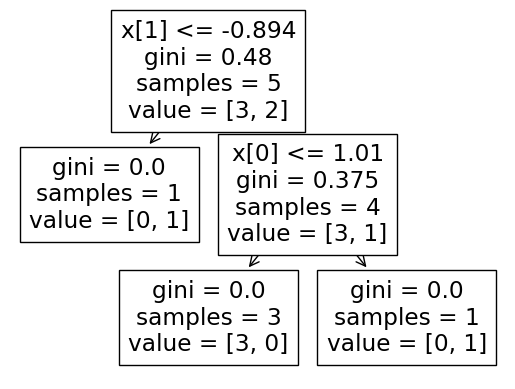

In [40]:
plot_tree(DTC)

In [41]:
DTC.feature_importances_

array([0.625, 0.375])

In [42]:
RFC=RandomForestClassifier(n_estimators=2)

In [43]:
RFC.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [44]:
RFC.feature_importances_

array([0., 1.])

In [52]:
RFC.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1949762602)

In [53]:
RFC.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=282924549)

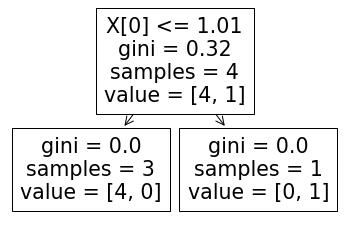

In [54]:
for i in range(0,2):
    plot_tree(RFC.estimators_[i])

[Text(0.6, 0.8333333333333334, 'X[0] <= 1.01\ngini = 0.48\nsamples = 4\nvalue = [2, 3]'),
 Text(0.4, 0.5, 'X[1] <= -0.894\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]')]

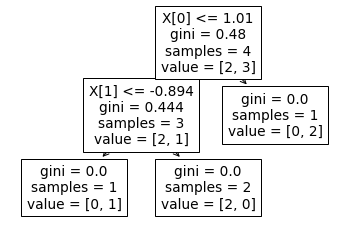

In [55]:
plot_tree(RFC.estimators_[0])

[Text(0.5, 0.75, 'X[0] <= 1.01\ngini = 0.32\nsamples = 4\nvalue = [4, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

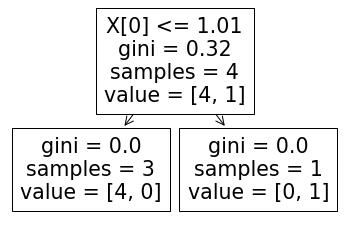

In [56]:
plot_tree(RFC.estimators_[1])

In [ ]:
# random forest vs bagging classifier you can can do as a assignment based on my theoritical explnation